In [56]:
%matplotlib inline 
import pandas as pd

In [57]:
df = pd.read_csv('data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


### Drop Columns with Large Amounts of Null

In [58]:
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [59]:
# Date is irrelevant
# Sunshine and Evaporation have over 60k nans
# RISK_MM is too correlated
# Cloud 9am, Cloud 3pm 50k nans
# WindDir, we are measuring form different locations
df = df.drop(columns=['Date', 'Sunshine', 'Evaporation', 'RISK_MM', 'Cloud9am', 'Cloud3pm', 'WindDir9am', 'WindDir3pm', 'WindGustDir', 'Location'])
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [60]:
df.isna().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [61]:
df = df.dropna()
df.shape

(119590, 14)

In [62]:
# Encode Binary Labels for True/False Values
df['RainToday'] = df['RainToday'].apply(lambda x: 0 if x == 'No' else 1)
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: 0 if x == 'No' else 1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


### Identify Outliers
By plotting histograms of our features we are able to visualize the distribution and identify outliers.

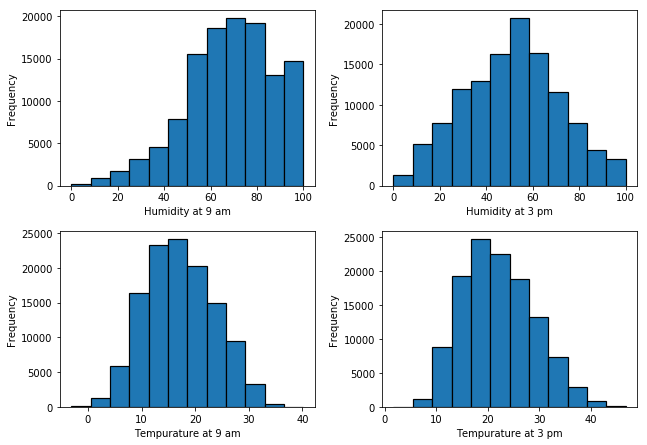

In [63]:
import matplotlib.pyplot as plt
n_bins = 12
grid = plt.GridSpec(4, 4)#, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[0,1])
ax3 = fig.add_subplot(grid[1,0])
ax4 = fig.add_subplot(grid[1,1])

ax1.hist(df['Humidity9am'].values,  bins=n_bins, edgecolor='black', linewidth=1.2)
ax1.set_xlabel('Humidity at 9 am')
ax1.set_ylabel('Frequency')

ax2.hist(df['Humidity3pm'].values,  bins=n_bins, edgecolor='black', linewidth=1.2)
ax2.set_xlabel('Humidity at 3 pm')
ax2.set_ylabel('Frequency')

ax3.hist(df['Temp9am'].values,  bins=n_bins, edgecolor='black', linewidth=1.2)
ax3.set_xlabel('Tempurature at 9 am')
ax3.set_ylabel('Frequency')

ax4.hist(df['Temp3pm'].values,  bins=n_bins, edgecolor='black', linewidth=1.2)
ax4.set_xlabel('Tempurature at 3 pm')
ax4.set_ylabel('Frequency')


plt.tight_layout()
plt.show()

We can see there are some clear outliers in humidity and tempurature at 9 am and 3 pm. Below we trim off some outliers for some of our features.

In [64]:
print(f"Dropping {len(df[df['Temp9am'] <= 5])} rows where (Temperature at 9 am) is less than 6 degrees")
df = df[df['Temp9am'] > 5]
print(f"Dropping {len(df[df['Temp3pm'] > 42])} rows where (Temperature at 3 pm) is greater than 42 degrees")
df = df[df['Temp3pm'] <= 42]
print(f"Dropping {len(df[df['Humidity9am'] <= 9])} rows where (Humidity at 9 am) is less than 10")
df = df[df['Humidity9am'] > 10]
print(df.shape)

Dropping 2265 rows where (Temperature at 9 am) is less than 6 degrees
Dropping 150 rows where (Temperature at 3 pm) is greater than 42 degrees
Dropping 251 rows where (Humidity at 9 am) is less than 10
(116855, 14)


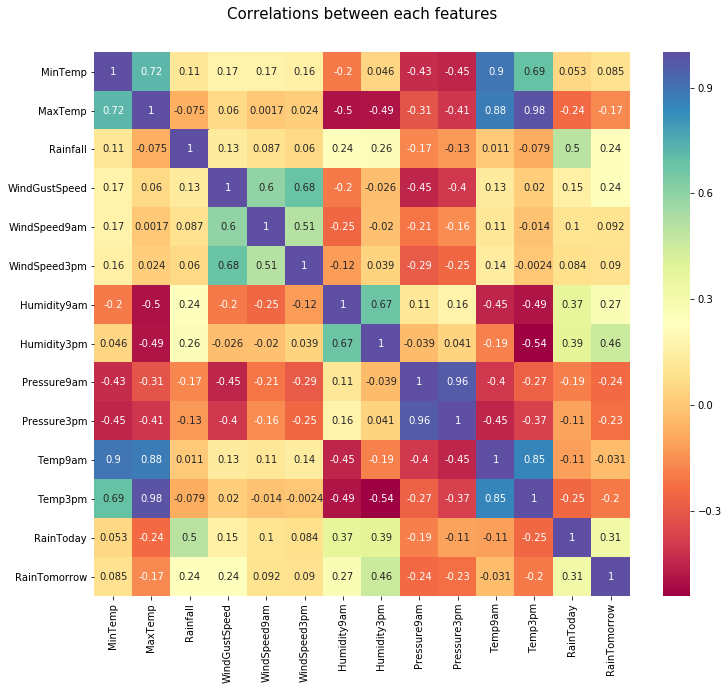

In [65]:
# update: the correlations to RainToday and RainTomorrow are also included.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
colormap = plt.cm.Spectral
plt.title('Correlations between each features', y=1.05, size=15)
corrs = df.corr()
sns.heatmap(corrs, cmap = colormap, linecolor = 'white', annot = True)

Text(0,0.5,'Correlation to RainTomorrow')

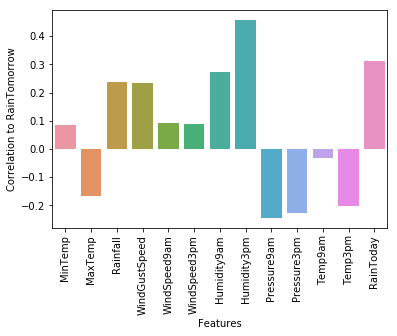

In [66]:
raintomorrow_corrs = corrs[['RainTomorrow']].drop(['RainTomorrow'], axis = 0).reset_index()
sns.barplot(x = 'index', y = 'RainTomorrow', data = raintomorrow_corrs)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation to RainTomorrow')

In [67]:
# A closer look into the numbers
raintomorrow_corrs['RainTomorrow'] = [abs(i) for i in raintomorrow_corrs['RainTomorrow']]
raintomorrow_corrs = raintomorrow_corrs.sort_values(by = 'RainTomorrow', ascending = False)
raintomorrow_corrs[:5]

,index,RainTomorrow
7,Humidity3pm,0.456052
12,RainToday,0.313550
6,Humidity9am,0.271905
8,Pressure9am,0.244576
2,Rainfall,0.237617


From the bar plot above, we can see that the top 5 most correlated features are 'Humidity3pm','RainToday','Humidity9am','Pressure9am',and 'Rainfall'. Those are probably the most significant features in our prediction, so we trained several models below to confirm our theory.

Note: 
Here, we rank the features based on the absolute value of their correlations, which represent the strength of correlation.

#### Helper Functions

In [68]:
def plot_model_results(history):
    val_loss = history.history['val_loss']
    train_loss = history.history['loss']
    val_acc = history.history['val_acc']
    train_acc = history.history['acc']

    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = [12, 5]

    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)
    x_range = len(train_loss)
    
    # Loss Axis
    ax1.plot(list(range(x_range)), train_loss)
    ax1.plot(list(range(x_range)), val_loss)
    ax1.set_xlabel('Epoch')
    ax1.legend(['training loss', 'validation loss'])
    ax1.set_ylabel('Binary Cross Entropy Loss')

    # Accuracy Axis
    ax2.plot(list(range(x_range)), train_acc)
    ax2.plot(list(range(x_range)), val_acc)
    ax2.legend(['training accuracy', 'validation accuracy'])
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    plt.tight_layout()
    plt.show()


def split_data(df, val_pct=.2, test_pct=.1):
    val_size   = int(val_pct * df.shape[0])
    test_size  = int(test_pct * df.shape[0])
    train_size = int((1.0 - (val_pct + test_pct)) * df.shape[0])
    df_train = df[:train_size]
    df_val = df[train_size : train_size + val_size]
    df_test = df[train_size + val_size : train_size + val_size + test_size]
    
    print(f"Training data length:   {len(df_train)}")
    print(f"Validation data length: {len(df_val)}")
    print(f"Test data length:       {len(df_test)}")

    y_train = df_train['RainTomorrow'].values
    y_test = df_test['RainTomorrow'].values
    y_val = df_val['RainTomorrow'].values
    X_train = df_train.drop(columns=['RainTomorrow']).values

    X_test = df_test.drop(columns=['RainTomorrow']).values
    X_val = df_val.drop(columns=['RainTomorrow']).values

    return X_train, X_val, X_test, y_train, y_val, y_test

## Splitting Into Targets and Labels
Below the train, test, and validation data sets are split into labels and targets then converted to numpy arrays.

In [69]:
rain_tomorrow = df['RainTomorrow']
df = (df - df.mean()) / df.std()
df['RainTomorrow'] = rain_tomorrow

X_train, X_val, X_test, y_train, y_val, y_test = split_data(df, val_pct=.2, test_pct=.1)
df.head()

Training data length:   81798
Validation data length: 23371
Test data length:       11685


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.128913,-0.106483,-0.206059,0.275396,0.629094,0.555250,0.158151,-1.400501,-1.401285,-1.158545,-0.081504,-0.045970,-0.537262,0
1,-0.846313,0.215952,-0.276203,0.275396,-1.199439,0.324134,-1.286403,-1.255039,-0.987789,-1.057633,-0.032851,0.328283,-0.537262,0
2,0.047644,0.303889,-0.276203,0.424875,0.514810,0.786367,-1.607415,-1.012603,-1.415544,-0.927888,0.583419,0.163612,-0.537262,0
3,-0.553745,0.640980,-0.276203,-1.219390,-0.399456,-1.178124,-1.232901,-1.691425,0.010307,-0.336831,0.113108,0.657626,-0.537262,0
4,0.795317,1.271194,-0.159297,0.051178,-0.856589,0.093017,0.746673,-0.867141,-0.959271,-1.317121,0.064455,1.136671,-0.537262,0


## Tensorflow Feed Forward Neural Network
Below we define a feed forward neural network. The network takes as input the features of a single day. The output is a sigmoid layer meaning our output layer is essentially a logistic regression layer. We use binary cross entropy loss and accuracy to evaluate model performace. The model is evaluated on validation data on every epoch.

## Model 1 (Baseline)
Here we fit the network onto the training data set for 10 epochs. We use our validation data to prevent overfitting. We use all of the features of our dataset to establish a baseline of performance. We will compare our reduced feature performace to this model.

In [70]:
import tensorflow as tf
from tensorflow import keras

INPUT_DIM = X_train.shape[1]
OUTPUT_DIM = 1
EPOCHS = 10
BATCH_SIZE = 128

model = keras.Sequential([
    keras.layers.Dense(32, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(32, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [71]:
from keras.callbacks import History 

history = History()
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), callbacks=[history])

Train on 81798 samples, validate on 23371 samples
Epoch 1/10
81798/81798 [==============================] - 2s 21us/step - loss: 0.3807 - acc: 0.8354 - binary_crossentropy: 0.3807 - val_loss: 0.3276 - val_acc: 0.8647 - val_binary_crossentropy: 0.3276
Epoch 2/10
81798/81798 [==============================] - 1s 15us/step - loss: 0.3621 - acc: 0.8454 - binary_crossentropy: 0.3621 - val_loss: 0.3267 - val_acc: 0.8622 - val_binary_crossentropy: 0.3267
Epoch 3/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.3589 - acc: 0.8475 - binary_crossentropy: 0.3589 - val_loss: 0.3286 - val_acc: 0.8602 - val_binary_crossentropy: 0.3286
Epoch 4/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.3570 - acc: 0.8478 - binary_crossentropy: 0.3570 - val_loss: 0.3204 - val_acc: 0.8620 - val_binary_crossentropy: 0.3204
Epoch 5/10
81798/81798 [==============================] - 1s 15us/step - loss: 0.3550 - acc: 0.8482 - binary_crossentropy: 0.3550 - val_loss: 0.32

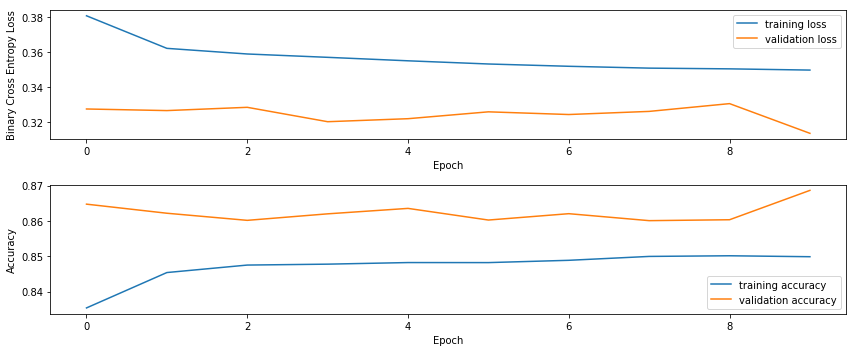

In [72]:
plot_model_results(history)

In [73]:
test_loss, test_acc, t = model.evaluate(X_test, y_test)
print(f"Model 1\nTest Loss: {test_loss}\nTest Accuracy: {test_acc}")

11685/11685 [==============================] - 0s 16us/step
Model 1
Test Loss: 0.29586615368411434
Test Accuracy: 0.8728284124946513


### Now train models with different features dropped
In this section, We drop the top 5 most correlated features that we picked in the previous section one by one. The one that affects test accuracy the most would be the most representative feature in our prediction.


#### Humidity 3pm

In [74]:
df_h = df.drop(columns=['Humidity3pm'])
X_train_h3pm, X_val_h3pm, X_test_h3pm, y_train_h3pm, y_val_h3pm, y_test_h3pm = split_data(df_h, val_pct=.2, test_pct=.1)


INPUT_DIM = X_train_h3pm.shape[1]

tf.keras.backend.clear_session()
model = keras.Sequential([
    keras.layers.Dense(32, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(32, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])
model.summary()

Training data length:   81798
Validation data length: 23371
Test data length:       11685
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,801
Trainable params: 8,801
Non-trainable params: 0
_________________________________________________________________


In [75]:
history = History()
model.fit(X_train_h3pm, y_train_h3pm, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_h3pm, y_val_h3pm), callbacks=[history])

Train on 81798 samples, validate on 23371 samples
Epoch 1/10
81798/81798 [==============================] - 2s 18us/step - loss: 0.4012 - acc: 0.8245 - binary_crossentropy: 0.4012 - val_loss: 0.3461 - val_acc: 0.8511 - val_binary_crossentropy: 0.3461
Epoch 2/10
81798/81798 [==============================] - 1s 12us/step - loss: 0.3833 - acc: 0.8348 - binary_crossentropy: 0.3833 - val_loss: 0.3432 - val_acc: 0.8529 - val_binary_crossentropy: 0.3432
Epoch 3/10
81798/81798 [==============================] - 1s 12us/step - loss: 0.3780 - acc: 0.8363 - binary_crossentropy: 0.3780 - val_loss: 0.3428 - val_acc: 0.8515 - val_binary_crossentropy: 0.3428
Epoch 4/10
81798/81798 [==============================] - 1s 12us/step - loss: 0.3760 - acc: 0.8376 - binary_crossentropy: 0.3760 - val_loss: 0.3348 - val_acc: 0.8582 - val_binary_crossentropy: 0.3348
Epoch 5/10
81798/81798 [==============================] - 1s 13us/step - loss: 0.3741 - acc: 0.8387 - binary_crossentropy: 0.3741 - val_loss: 0.34

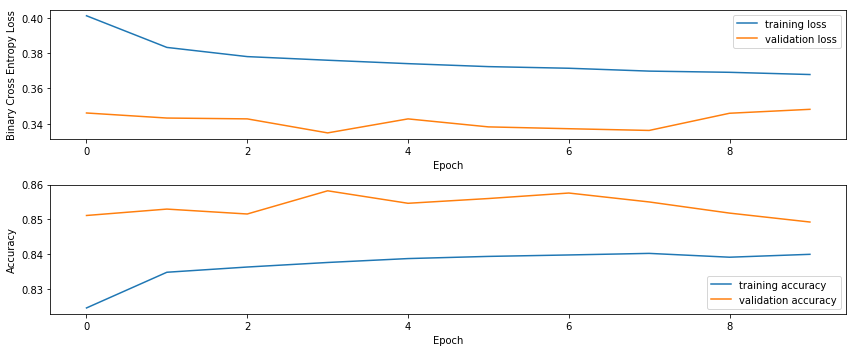

In [76]:
plot_model_results(history)

In [77]:
test_loss_h3pm, test_acc_h3pm, t = model.evaluate(X_test_h3pm, y_test_h3pm)
print(f"Test Loss: {test_loss_h3pm}\nTest Accuracy: {test_acc_h3pm}")

11685/11685 [==============================] - 0s 15us/step
Test Loss: 0.2977666118503841
Test Accuracy: 0.8747967479674796


#### Rain Today

In [78]:
df_rt = df.drop(columns=['RainToday'])
X_train_rt, X_val_rt, X_test_rt, y_train_rt, y_val_rt, y_test_rt = split_data(df_rt, val_pct=.2, test_pct=.1)


INPUT_DIM = X_train_rt.shape[1]

tf.keras.backend.clear_session()
model = keras.Sequential([
    keras.layers.Dense(32, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(32, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])
model.summary()

Training data length:   81798
Validation data length: 23371
Test data length:       11685
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,801
Trainable params: 8,801
Non-trainable params: 0
_________________________________________________________________


In [79]:
history = History()
model.fit(X_train_rt, y_train_rt, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_rt, y_val_rt), callbacks=[history])

Train on 81798 samples, validate on 23371 samples
Epoch 1/10
81798/81798 [==============================] - 1s 18us/step - loss: 0.3811 - acc: 0.8354 - binary_crossentropy: 0.3811 - val_loss: 0.3219 - val_acc: 0.8650 - val_binary_crossentropy: 0.3219
Epoch 2/10
81798/81798 [==============================] - 1s 13us/step - loss: 0.3635 - acc: 0.8446 - binary_crossentropy: 0.3635 - val_loss: 0.3311 - val_acc: 0.8617 - val_binary_crossentropy: 0.3311
Epoch 3/10
81798/81798 [==============================] - 1s 12us/step - loss: 0.3600 - acc: 0.8463 - binary_crossentropy: 0.3600 - val_loss: 0.3293 - val_acc: 0.8614 - val_binary_crossentropy: 0.3293
Epoch 4/10
81798/81798 [==============================] - 1s 13us/step - loss: 0.3585 - acc: 0.8460 - binary_crossentropy: 0.3585 - val_loss: 0.3270 - val_acc: 0.8613 - val_binary_crossentropy: 0.3270
Epoch 5/10
81798/81798 [==============================] - 1s 12us/step - loss: 0.3561 - acc: 0.8476 - binary_crossentropy: 0.3561 - val_loss: 0.32

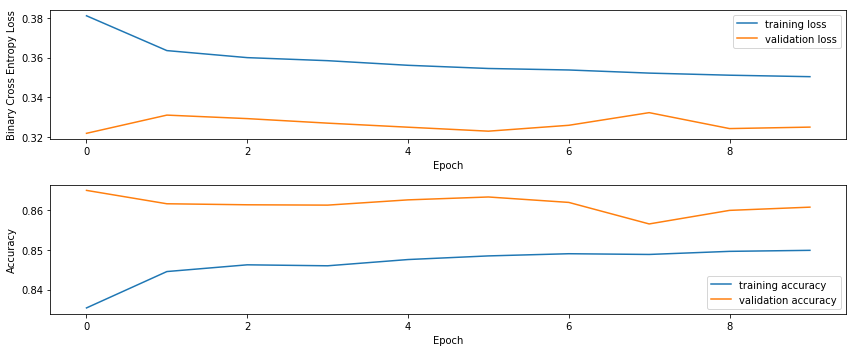

In [80]:
plot_model_results(history)

In [81]:
test_loss_rt, test_acc_rt, t = model.evaluate(X_test_rt, y_test_rt)
print(f"Test Loss: {test_loss_rt}\nTest Accuracy: {test_acc_rt}")

11685/11685 [==============================] - 0s 15us/step
Test Loss: 0.2949212547252174
Test Accuracy: 0.8741976893453145


#### Humidity 9am

In [82]:
df_h9 = df.drop(columns=['Humidity9am'])
X_train_h9am, X_val_h9am, X_test_h9am, y_train_h9am, y_val_h9am, y_test_h9am = split_data(df_h9, val_pct=.2, test_pct=.1)


INPUT_DIM = X_train_h9am.shape[1]

tf.keras.backend.clear_session()
model = keras.Sequential([
    keras.layers.Dense(32, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(32, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])
model.summary()

Training data length:   81798
Validation data length: 23371
Test data length:       11685
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,801
Trainable params: 8,801
Non-trainable params: 0
_________________________________________________________________


In [83]:
history = History()
model.fit(X_train_h9am, y_train_h9am, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_h9am, y_val_h9am), callbacks=[history])

Train on 81798 samples, validate on 23371 samples
Epoch 1/10
81798/81798 [==============================] - 1s 17us/step - loss: 0.3743 - acc: 0.8391 - binary_crossentropy: 0.3743 - val_loss: 0.3365 - val_acc: 0.8602 - val_binary_crossentropy: 0.3365
Epoch 2/10
81798/81798 [==============================] - 1s 15us/step - loss: 0.3632 - acc: 0.8436 - binary_crossentropy: 0.3632 - val_loss: 0.3290 - val_acc: 0.8627 - val_binary_crossentropy: 0.3290
Epoch 3/10
81798/81798 [==============================] - 1s 15us/step - loss: 0.3597 - acc: 0.8450 - binary_crossentropy: 0.3597 - val_loss: 0.3204 - val_acc: 0.8669 - val_binary_crossentropy: 0.3204
Epoch 4/10
81798/81798 [==============================] - 1s 16us/step - loss: 0.3578 - acc: 0.8461 - binary_crossentropy: 0.3578 - val_loss: 0.3229 - val_acc: 0.8647 - val_binary_crossentropy: 0.3229
Epoch 5/10
81798/81798 [==============================] - 1s 15us/step - loss: 0.3558 - acc: 0.8466 - binary_crossentropy: 0.3558 - val_loss: 0.32

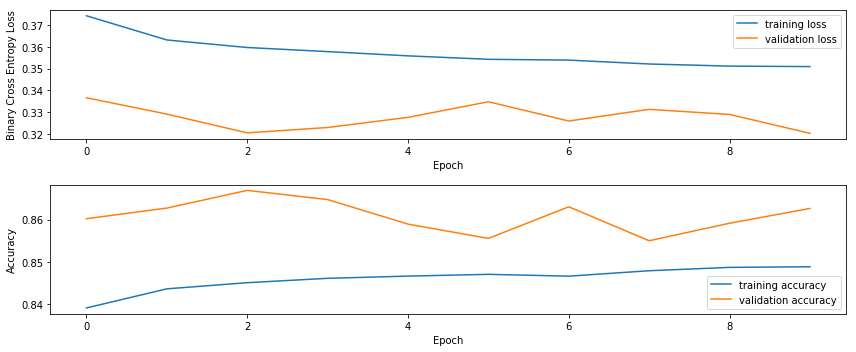

In [84]:
plot_model_results(history)

In [85]:
test_loss_h9am, test_acc_h9am, t = model.evaluate(X_test_h9am, y_test_h9am)
print(f"Test Loss: {test_loss_h9am}\nTest Accuracy: {test_acc_h9am}")

11685/11685 [==============================] - 0s 15us/step
Test Loss: 0.2914749733313032
Test Accuracy: 0.8734274711168164


#### Rainfall

In [86]:
df_rf = df.drop(columns=['Rainfall'])
X_train_rf, X_val_rf, X_test_rf, y_train_rf, y_val_rf, y_test_rf = split_data(df_rf, val_pct=.2, test_pct=.1)


INPUT_DIM = X_train_rf.shape[1]

tf.keras.backend.clear_session()
model = keras.Sequential([
    keras.layers.Dense(32, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(32, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])
model.summary()

Training data length:   81798
Validation data length: 23371
Test data length:       11685
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,801
Trainable params: 8,801
Non-trainable params: 0
_________________________________________________________________


In [87]:
history = History()
model.fit(X_train_rf, y_train_rf, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_rf, y_val_rf), callbacks=[history])

Train on 81798 samples, validate on 23371 samples
Epoch 1/10
81798/81798 [==============================] - 1s 17us/step - loss: 0.3779 - acc: 0.8370 - binary_crossentropy: 0.3779 - val_loss: 0.3348 - val_acc: 0.8585 - val_binary_crossentropy: 0.3348
Epoch 2/10
81798/81798 [==============================] - 1s 13us/step - loss: 0.3613 - acc: 0.8455 - binary_crossentropy: 0.3613 - val_loss: 0.3276 - val_acc: 0.8614 - val_binary_crossentropy: 0.3276
Epoch 3/10
81798/81798 [==============================] - 1s 13us/step - loss: 0.3587 - acc: 0.8473 - binary_crossentropy: 0.3587 - val_loss: 0.3313 - val_acc: 0.8586 - val_binary_crossentropy: 0.3313
Epoch 4/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.3568 - acc: 0.8468 - binary_crossentropy: 0.3568 - val_loss: 0.3338 - val_acc: 0.8599 - val_binary_crossentropy: 0.3338
Epoch 5/10
81798/81798 [==============================] - 1s 15us/step - loss: 0.3547 - acc: 0.8480 - binary_crossentropy: 0.3547 - val_loss: 0.32

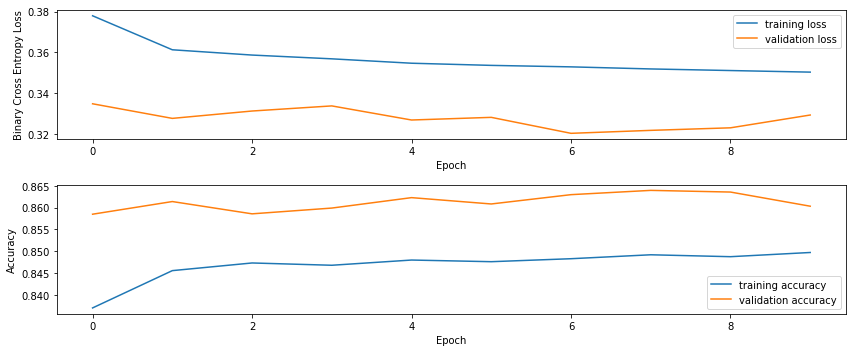

In [88]:
plot_model_results(history)

In [89]:
test_loss_rf, test_acc_rf, t = model.evaluate(X_test_rf, y_test_rf)
print(f"Test Loss: {test_loss_rf}\nTest Accuracy: {test_acc_rf}")

11685/11685 [==============================] - 0s 15us/step
Test Loss: 0.3040247404593201
Test Accuracy: 0.8700898587933248


#### Pressure 9 am

In [90]:
df_p9am = df.drop(columns=['Rainfall'])
X_train_p9am, X_val_p9am, X_test_p9am, y_train_p9am, y_val_p9am, y_test_p9am = split_data(df_p9am, val_pct=.2, test_pct=.1)


INPUT_DIM = X_train_p9am.shape[1]

tf.keras.backend.clear_session()
model = keras.Sequential([
    keras.layers.Dense(32, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(32, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])
model.summary()

Training data length:   81798
Validation data length: 23371
Test data length:       11685
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,801
Trainable params: 8,801
Non-trainable params: 0
_________________________________________________________________


In [91]:
history = History()
model.fit(X_train_p9am, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_p9am, y_val), callbacks=[history])

Train on 81798 samples, validate on 23371 samples
Epoch 1/10
81798/81798 [==============================] - 1s 17us/step - loss: 0.3770 - acc: 0.8378 - binary_crossentropy: 0.3770 - val_loss: 0.3251 - val_acc: 0.8629 - val_binary_crossentropy: 0.3251
Epoch 2/10
81798/81798 [==============================] - 1s 13us/step - loss: 0.3623 - acc: 0.8446 - binary_crossentropy: 0.3623 - val_loss: 0.3299 - val_acc: 0.8639 - val_binary_crossentropy: 0.3299
Epoch 3/10
81798/81798 [==============================] - 1s 15us/step - loss: 0.3592 - acc: 0.8462 - binary_crossentropy: 0.3592 - val_loss: 0.3287 - val_acc: 0.8627 - val_binary_crossentropy: 0.3287
Epoch 4/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.3575 - acc: 0.8469 - binary_crossentropy: 0.3575 - val_loss: 0.3314 - val_acc: 0.8583 - val_binary_crossentropy: 0.3314
Epoch 5/10
81798/81798 [==============================] - 1s 15us/step - loss: 0.3556 - acc: 0.8482 - binary_crossentropy: 0.3556 - val_loss: 0.33

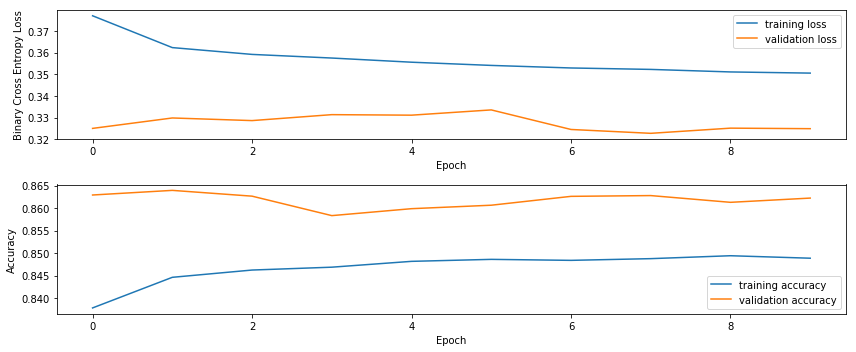

In [92]:
plot_model_results(history)

In [93]:
test_loss_p9am, test_acc_p9am, t = model.evaluate(X_test_p9am, y_test)
print(f"Test Loss: {test_loss_p9am}\nTest Accuracy: {test_acc_p9am}")

11685/11685 [==============================] - 0s 15us/step
Test Loss: 0.29306515096792385
Test Accuracy: 0.8757381258023107


#### Rank Models

In [94]:
result = {'Models':['Base line','Without Humidity 3pm',"Without Rain Today", 'Without Humidity 9am','Without Rainfall','Without Pressure 9am'], 
          'Test Accuracy':[test_acc, test_acc_h3pm, test_acc_rt, test_acc_h9am,test_acc_rf, test_acc_p9am]}
result_df = pd.DataFrame(data = result)
result_df['Difference from Base line'] = [test_acc - i for i in result_df['Test Accuracy']]
result_df.sort_values(by = 'Difference from Base line', ascending=False).set_index('Models')

,Test Accuracy,Difference from Base line
Models,,
Without Rainfall,0.870090,0.002739
Base line,0.872828,0.000000
Without Humidity 9am,0.873427,-0.000599
Without Rain Today,0.874198,-0.001369
Without Humidity 3pm,0.874797,-0.001968
Without Pressure 9am,0.875738,-0.002910


Text(0,0.5,'Differences')

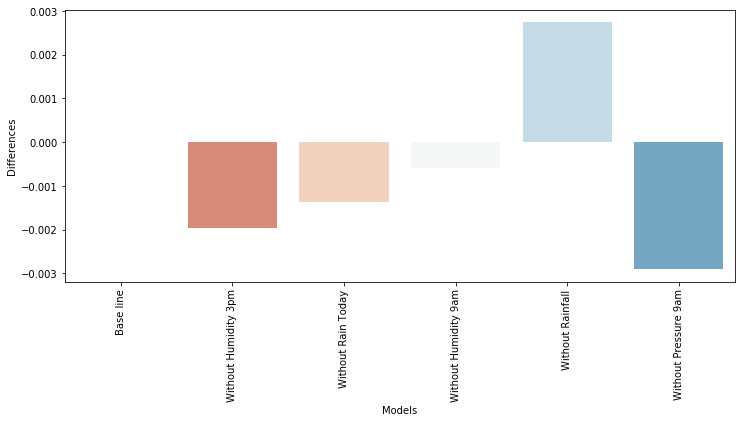

In [95]:
sns.barplot(x = 'Models', y = 'Difference from Base line', data = result_df, palette=sns.color_palette("RdBu", n_colors=7))
plt.xticks(rotation=90)
plt.xlabel('Models')
plt.ylabel('Differences')

### Result
From the plot above, we can see that the most significant feature in our prediction is Humidity (the closest to baseline), which proved our hypothesis that humidity is more influencial on the weather next day.

### Model 3
Here we train a neural network with the same architecture as the baseline on a reduced dataset. We drop all columns other than humidity at 9 am and 3 pm. We then train the network in the same fashion as before, utilizing a validation dataset to prevent overfitting

In [96]:
df = df[['Humidity9am', 'Humidity3pm', 'RainTomorrow']]
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df, val_pct=.2, test_pct=.1)
df.head()

Training data length:   81798
Validation data length: 23371
Test data length:       11685


,Humidity9am,Humidity3pm,RainTomorrow
0,0.158151,-1.400501,0
1,-1.286403,-1.255039,0
2,-1.607415,-1.012603,0
3,-1.232901,-1.691425,0
4,0.746673,-0.867141,0


In [97]:
import tensorflow as tf
from tensorflow import keras

INPUT_DIM = X_train.shape[1]

tf.keras.backend.clear_session()
model = keras.Sequential([
    keras.layers.Dense(32, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(32, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,481
Trainable params: 8,481
Non-trainable params: 0
_________________________________________________________________


In [98]:
from keras.callbacks import History 

history = History()
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), callbacks=[history])

Train on 81798 samples, validate on 23371 samples
Epoch 1/10
81798/81798 [==============================] - 2s 20us/step - loss: 0.4244 - acc: 0.8210 - binary_crossentropy: 0.4244 - val_loss: 0.3975 - val_acc: 0.8313 - val_binary_crossentropy: 0.3975
Epoch 2/10
81798/81798 [==============================] - 2s 19us/step - loss: 0.4171 - acc: 0.8253 - binary_crossentropy: 0.4171 - val_loss: 0.4003 - val_acc: 0.8295 - val_binary_crossentropy: 0.4003
Epoch 3/10
81798/81798 [==============================] - 1s 13us/step - loss: 0.4164 - acc: 0.8261 - binary_crossentropy: 0.4164 - val_loss: 0.4039 - val_acc: 0.8276 - val_binary_crossentropy: 0.4039
Epoch 4/10
81798/81798 [==============================] - 1s 13us/step - loss: 0.4157 - acc: 0.8263 - binary_crossentropy: 0.4157 - val_loss: 0.4016 - val_acc: 0.8275 - val_binary_crossentropy: 0.4016
Epoch 5/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.4157 - acc: 0.8265 - binary_crossentropy: 0.4157 - val_loss: 0.39

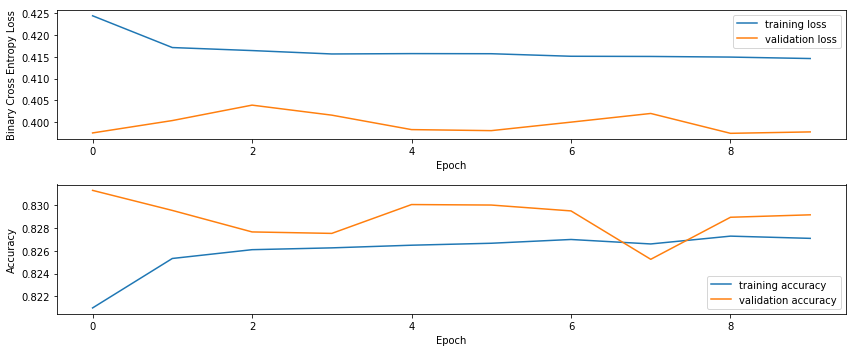

In [99]:
plot_model_results(history)

In [100]:
test_loss, test_acc, t = model.evaluate(X_test, y_test)
print(f"Model 3\nTest Loss: {test_loss}\nTest Accuracy: {test_acc}")

11685/11685 [==============================] - 0s 17us/step
Model 3
Test Loss: 0.3488834825033146
Test Accuracy: 0.856140350877193


## Analysis

